In [13]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense ,Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [64]:
data = pd.read_csv('microsoft stock prices/all_2018-03-26_2022_23.csv')
data['Date'] = pd.to_datetime(data['Date'])
scaler = MinMaxScaler()
numerical_features = ['Open', 'High', 'Low', 'Volume']
data[numerical_features] = scaler.fit_transform(data[numerical_features])
data_close=data.filter(['Close'])
dataset=data_close.values
training_data_len=math.ceil(len(dataset)*0.8)
data

,Date,Open,High,Low,Close,Adj Close,Volume,GNewsTitle,GDeltTitle
0,2018-03-26,0.010749,0.015215,0.011347,93.779999,89.375473,0.463631,Here's how Sea of Thieves is anti-toxic by des...,Amdocs and Microsoft to open source ONAP for A...
1,2018-03-27,0.027612,0.019606,0.003926,89.470001,85.267906,0.465315,Microsoft and Mawingu Networks Report Apprecia...,"Apple upgrades iPad , priced $399 for students..."
2,2018-03-28,0.007672,0.004545,0.005340,89.389999,85.191658,0.425532,Tencent Kicks Off Data Center Expansion with N...,Sea of Thieves attracts more than 2 million pl...
3,2018-03-29,0.009074,0.008628,0.003494,91.269997,86.983345,0.360658,Microsoft Profanity Ban: No Damn Swearing on A...,Microsoft shakes up ranks to shoot for the clo...
4,2018-04-02,0.010204,0.003197,0.000000,88.519997,84.362511,0.386553,This Brilliant Man is the World’s Youngest Pro...,Today . Az\nMicrosoft launches 2 new Azure reg...
...,...,...,...,...,...,...,...,...,...
996,2022-03-17,0.800094,0.791772,0.792571,295.220001,295.220001,0.213465,Microsoft Releases Open Source Tool for Securi...,Download PDF Converter for Mac\nMicrosoft face...
997,2022-03-18,0.808194,0.812534,0.805764,300.429993,300.429993,0.335715,50% of companies want workers back in office 5...,"Ransomware Hackers Used AI Images , Microsoft ..."
998,2022-03-21,0.821903,0.809221,0.814284,299.160004,299.160004,0.189354,Does Sony Finally Have Its Answer to Microsoft...,Microsoft Surface Laptop 4 review : Perfect fo...
999,2022-03-22,0.825447,0.827941,0.829479,304.059998,304.059998,0.182005,Lapsus$ gang says it has breached Okta and Mic...,Microsoft Sonic - themed Xbox giveaway include...


In [65]:
texts = data['GNewsTitle']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
data_padded = pad_sequences(sequences, maxlen=100) 


In [111]:
high = data['Close']
X_train, X_test, y_train, y_test = train_test_split(data_padded, high, test_size=0.02)

In [112]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=100))
model.add(LSTM(128))
model.add(Dense(1)) 

In [121]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=300)

Epoch 1/300
31/31 [==============================] - 3s 62ms/step - loss: 1561.8716
Epoch 2/300
31/31 [==============================] - 2s 61ms/step - loss: 1884.7467
Epoch 3/300
31/31 [==============================] - 2s 62ms/step - loss: 2866.9109
Epoch 4/300
31/31 [==============================] - 2s 61ms/step - loss: 2519.4529
Epoch 5/300
31/31 [==============================] - 2s 60ms/step - loss: 2164.7148
Epoch 6/300
31/31 [==============================] - 2s 60ms/step - loss: 1992.2821
Epoch 7/300
31/31 [==============================] - 2s 61ms/step - loss: 1963.9612
Epoch 8/300
31/31 [==============================] - 2s 62ms/step - loss: 1883.5388
Epoch 9/300
31/31 [==============================] - 2s 61ms/step - loss: 1647.7676
Epoch 10/300
31/31 [==============================] - 2s 61ms/step - loss: 1582.9142
Epoch 11/300
31/31 [==============================] - 2s 61ms/step - loss: 1590.1252
Epoch 12/300
31/31 [==============================] - 2s 61ms/step - loss:

In [122]:
predictions =model.predict(X_test)
train=data[:len(X_train)]
valid=data[len(X_train):]
valid['Predictions']=predictions
predictions

1/1 [==============================] - 0s 215ms/step


/var/folders/vl/87j6bs1s2l36fj2qj8r53wrc0000gn/T/ipykernel_13077/2832107639.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


array([[230.98878 ],
       [262.24    ],
       [ 44.27575 ],
       [271.65256 ],
       [138.78833 ],
       [244.7979  ],
       [161.4857  ],
       [120.71473 ],
       [168.80898 ],
       [279.87497 ],
       [113.132515],
       [240.77753 ],
       [ 96.65656 ],
       [217.61009 ],
       [191.26651 ],
       [200.881   ],
       [217.92953 ],
       [170.66951 ],
       [260.34555 ],
       [133.81386 ],
       [130.44621 ]], dtype=float32)

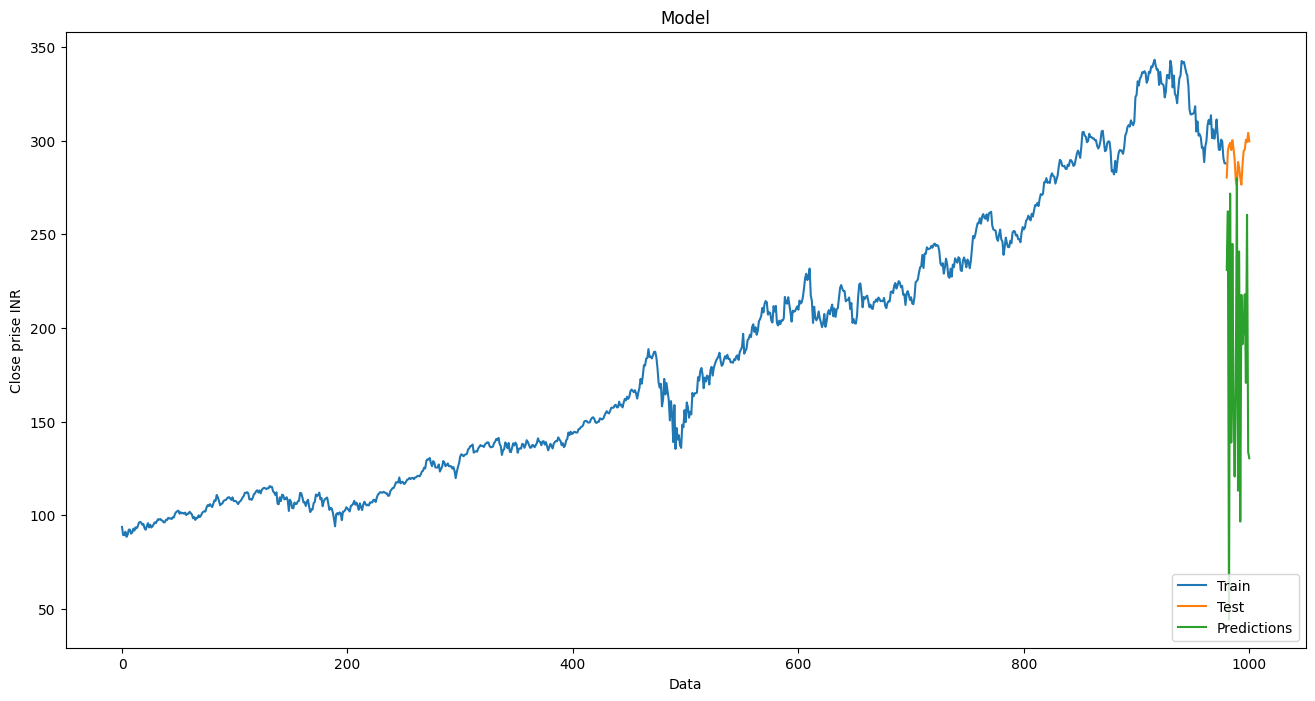

In [123]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data')
plt.ylabel('Close prise INR')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Test','Predictions'],loc='lower right')
plt.show()